In [185]:
from PIL import Image, ImageFilter
import numpy as np
from matplotlib import pyplot as plt
import skimage

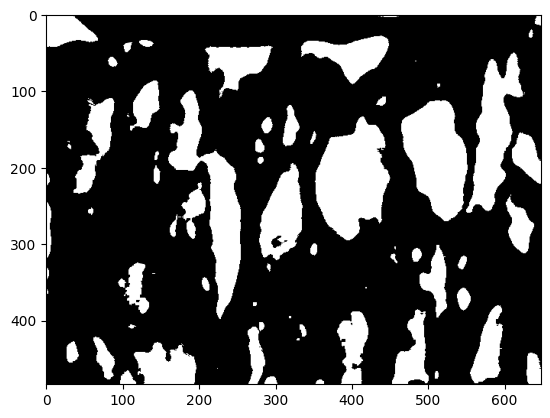

In [202]:
im = Image.open(str(0) + ".png").convert('L')
im = im.filter(ImageFilter.GaussianBlur(radius=3))
backgroundlight = im.filter(ImageFilter.GaussianBlur(radius=50))

imdata = np.asarray(im.getdata()).reshape((im.height, im.width)) 
bglightdata = np.asarray(backgroundlight.getdata()).reshape((im.height, im.width)) 



rectifiedIm = bglightdata - imdata 
rectifiedIm = (rectifiedIm > 10) 
plt.imshow(rectifiedIm, cmap='gray')
rectifiedIm = skimage.morphology.opening(rectifiedIm)

#plt.imshow(rectifiedIm, cmap='gray')

16


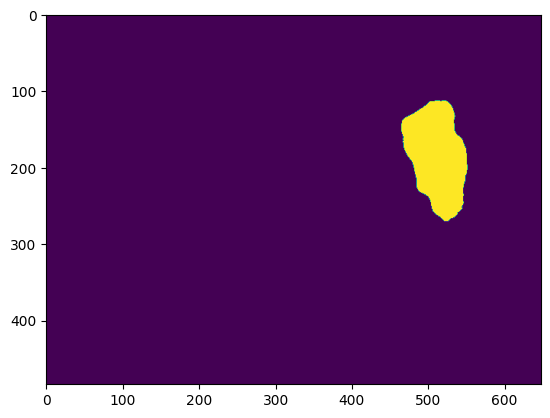

In [197]:
labeled = skimage.measure.label(rectifiedIm)
regions = skimage.measure.regionprops(labeled)

#Find the region with the largest area
areas = [r.area for r in regions]
sortedAreasIndexs = np.argsort(areas)[::-1]
selectedPore = sortedAreasIndexs[2]
print(selectedPore)
targetPore = regions[selectedPore]

initialbbox = targetPore.bbox


plt.imshow(labeled == selectedPore + 1) #not sure why we have to add one here

In [198]:
def findClosest(regions, targetLoc):
    minDist = np.inf
    closestIndex = -1
    closest = 0
    
    for i in range(len(regions)):
        r = regions[i].centroid
        xdiff = targetLoc[0] - r[0]
        ydiff = targetLoc[1] - r[1]
        dist = xdiff**2 + ydiff**2
        if dist < minDist:
            minDist = dist
            closestIndex = i
            closest = regions[i]

    return closest, closestIndex

In [199]:
#now for the next images, find the area with the closest centroid which should track one pore
frames = []

for i in range(0, 14):
    imoriginal = Image.open(str(i) + ".png").convert('L')
    im = imoriginal.filter(ImageFilter.GaussianBlur(radius=3))
    backgroundlight = imoriginal.filter(ImageFilter.GaussianBlur(radius=50))

    imdata = np.asarray(im.getdata()).reshape((im.height, im.width)) 
    bglightdata = np.asarray(backgroundlight.getdata()).reshape((im.height, im.width)) 

    rectifiedIm = bglightdata - imdata 
    rectifiedIm = (rectifiedIm > 10)  
    rectifiedIm = skimage.morphology.opening(rectifiedIm)

    labeled = skimage.measure.label(rectifiedIm)
    regions = skimage.measure.regionprops(labeled)


    targetPore, closestIndex = findClosest(regions, targetPore.centroid)

    #add the selected pore image onto the background image
    binaryImage = labeled == closestIndex + 1
    outImage = np.where(binaryImage, 1, imoriginal)

    newIm = Image.fromarray(outImage)

    frames.append(newIm.convert('P'))
    
    
finalbbox = targetPore.bbox


In [200]:
frames[0].save("out3.gif", save_all=True, append_images=frames[1:], duration = 200, loop=0)


In [191]:
initialW = initialbbox[2] - initialbbox[0]
initialH = initialbbox[3] - initialbbox[1]

finalW = finalbbox[2] - finalbbox[0]
finalH = finalbbox[3] - finalbbox[1]

print(initialW)
print(finalW)
print()
print(initialH)
print(finalH)

#plot of height and width vs time
#plot of strain in x and y vs time


162
151

99
124


In [203]:
targetPore.area

15399.0